In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
for i in data.columns:
    print(i, data[i].isnull().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 872
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrS

In [7]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Handling NULL Values

Extracting only NULL Value Columns

In [8]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(i,round(100*data[i].isnull().sum()/len(data[i]), 2))

LotFrontage 17.74
Alley 93.77
MasVnrType 59.73
MasVnrArea 0.55
BsmtQual 2.53
BsmtCond 2.53
BsmtExposure 2.6
BsmtFinType1 2.53
BsmtFinType2 2.6
Electrical 0.07
FireplaceQu 47.26
GarageType 5.55
GarageYrBlt 5.55
GarageFinish 5.55
GarageQual 5.55
GarageCond 5.55
PoolQC 99.52
Fence 80.75
MiscFeature 96.3


Dropping Columns with with high NULL values.

In [9]:
data.drop(["Id","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)
#These columns have high percent of null values
#Id columns has no meaning

Impute Categorical Variables.

In [10]:
cat_columns = ["Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
              "FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond"]
cont_columns = ["LotFrontage","LotArea","MasVnrArea","GarageYrBlt"]

In [11]:
for i in cat_columns:
    data[i].fillna("none", inplace=True)

In [12]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(i,round(100*data[i].isnull().sum()/len(data[i]), 2))

LotFrontage 17.74
MasVnrArea 0.55
Electrical 0.07
GarageYrBlt 5.55


In [13]:
data["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [14]:
data["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [15]:
data["GarageYrBlt"].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [16]:
data["Electrical"].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

Imputing Continous Variables

In [17]:
#Impute Lot frontage columns with median values from neighborhood values
data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [18]:
#Fill median values in continuous columns 
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)

In [19]:
#Drop null values in electrical column
data["Electrical"].dropna(inplace=True)

# EDA

In [20]:
data.shape  #1460 rows retained in the data set

(1460, 77)

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

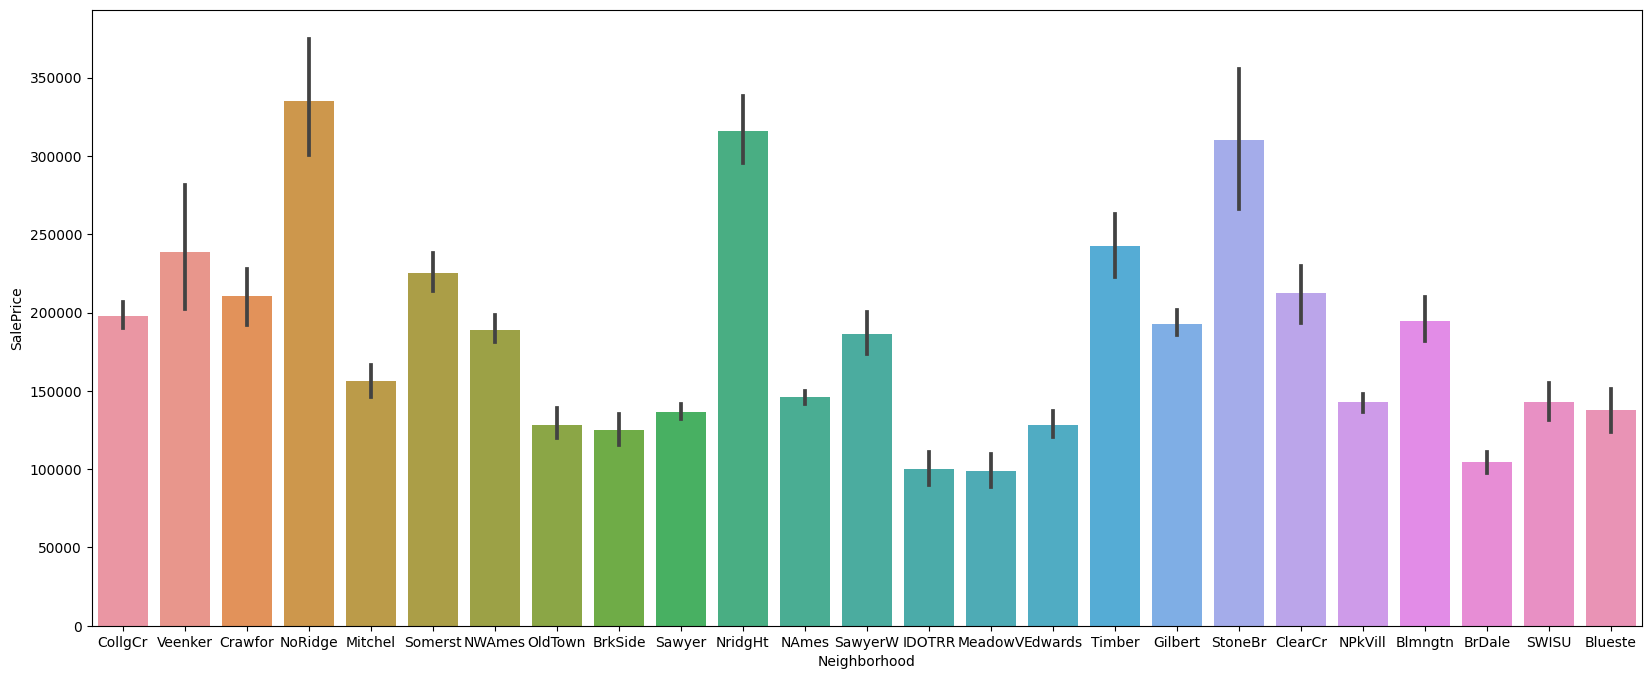

In [21]:
plt.figure(figsize=(20, 8))
sns.barplot(x=data['Neighborhood'], y=data['SalePrice'])

<Axes: xlabel='BldgType', ylabel='SalePrice'>

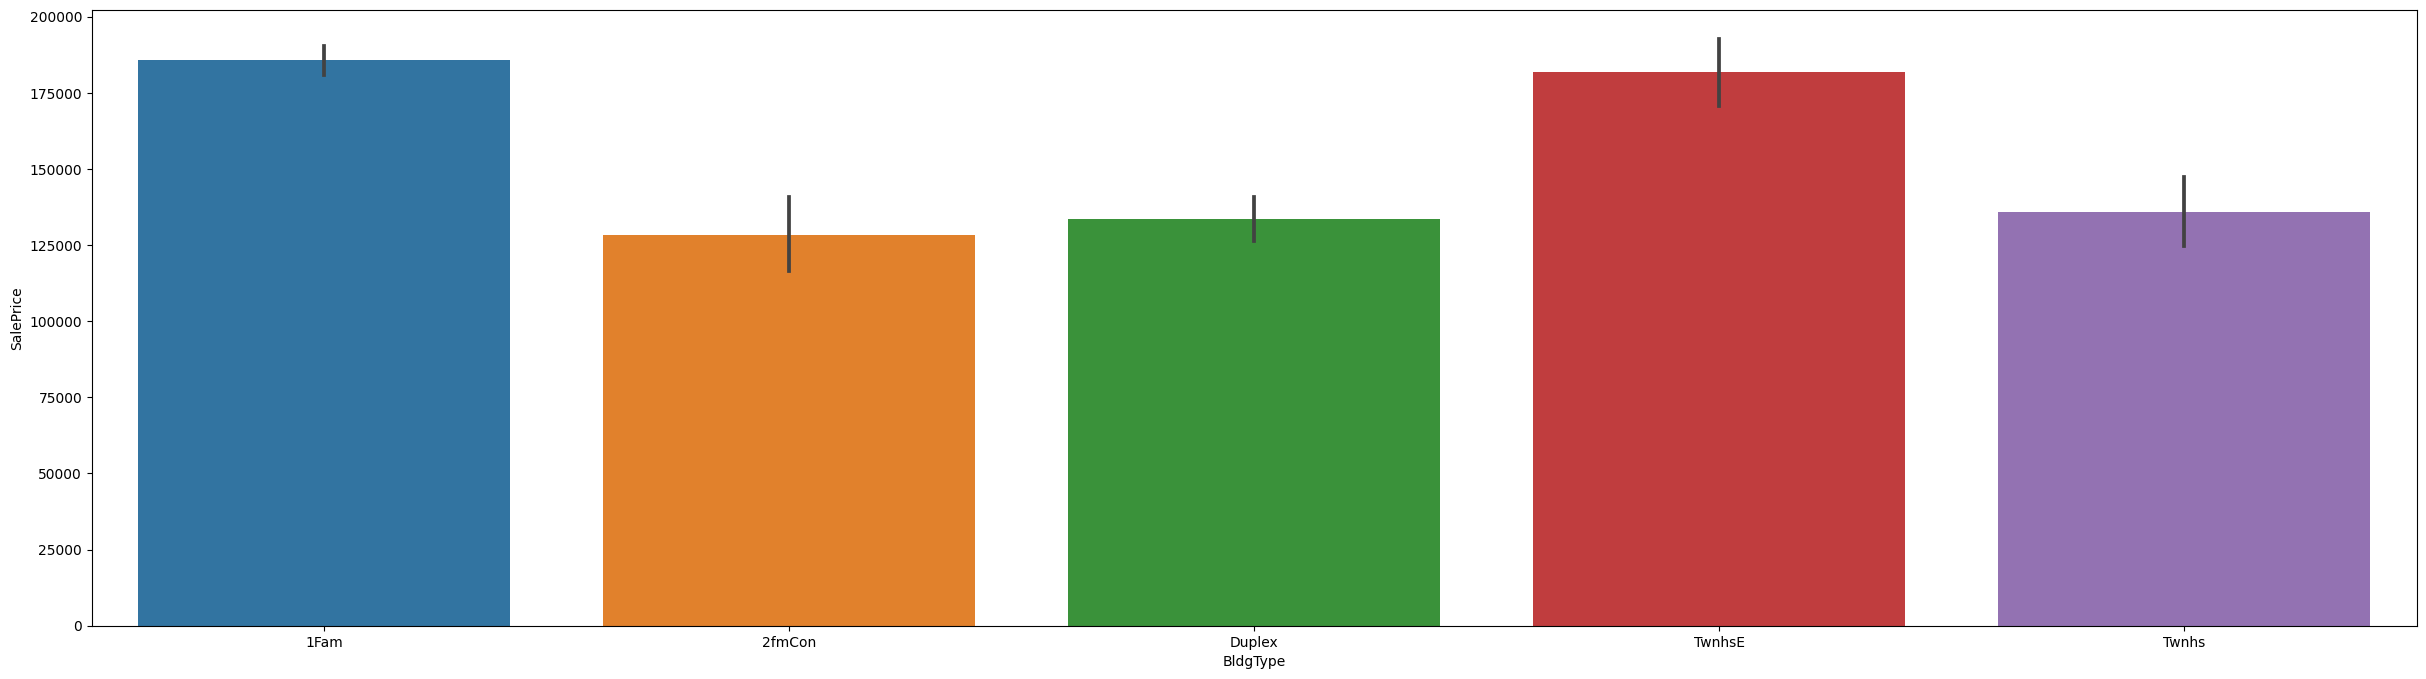

In [22]:
plt.figure(figsize=(30, 8))
sns.barplot(x=data['BldgType'], y=data['SalePrice'])

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

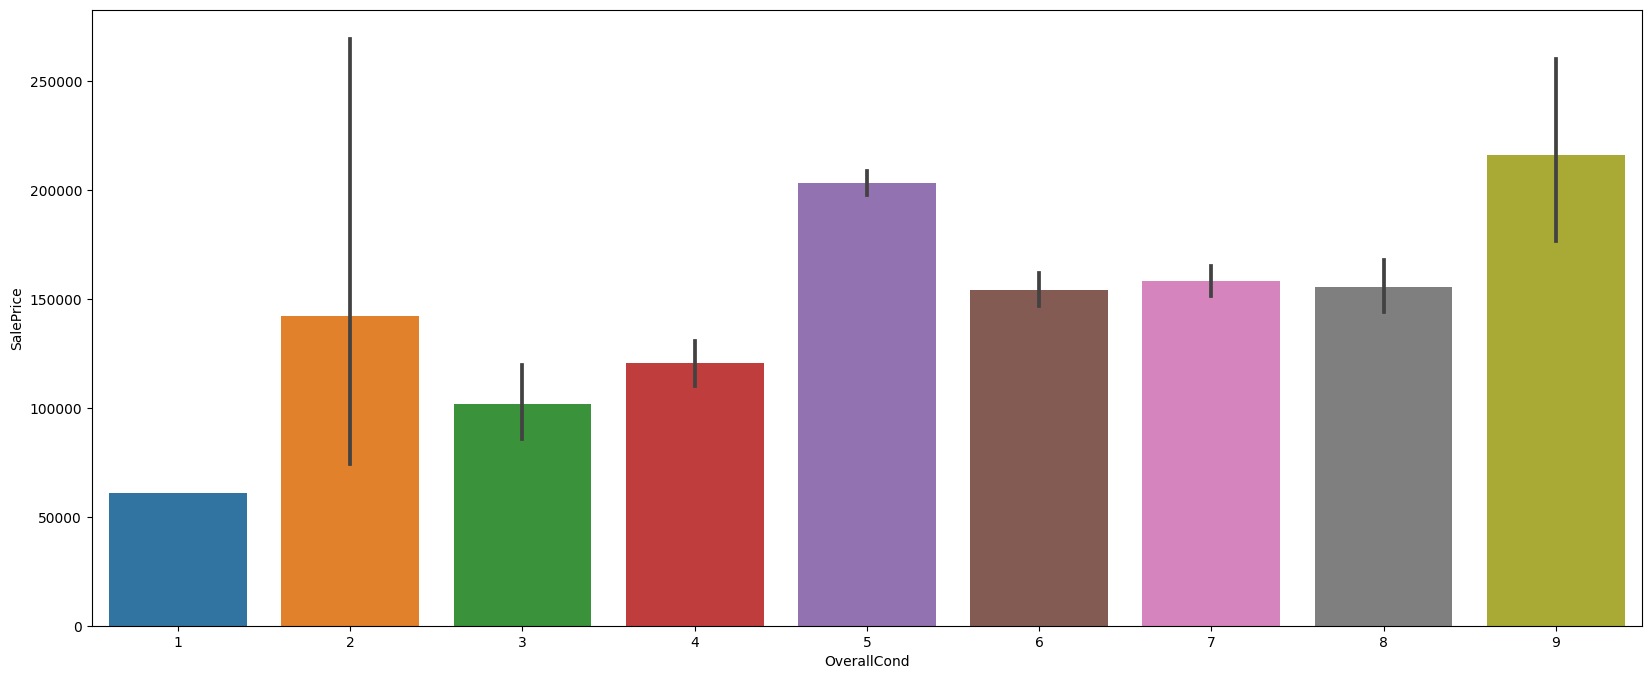

In [23]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= data)

<Axes: xlabel='SalePrice', ylabel='Density'>

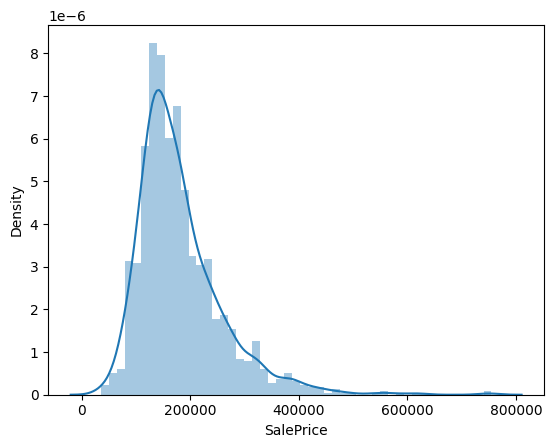

In [24]:
sns.distplot(data['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

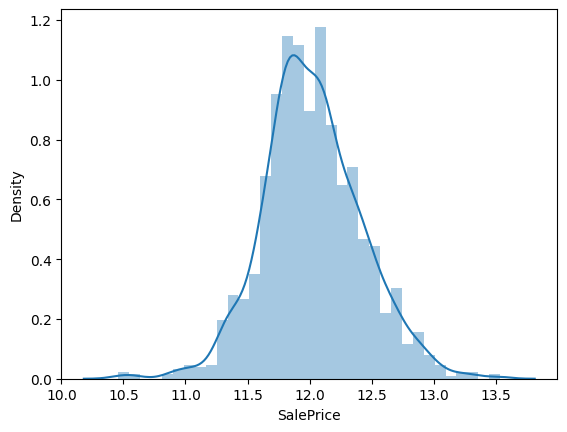

In [25]:
#Target variable is skewed towards one side, hence transformation is required
data['SalePrice']=np.log1p(data['SalePrice'])
sns.distplot(data['SalePrice'])

In [26]:
types = data.dtypes
cont_type = types[(types == 'int64') | (types == float)] 
cat_type = types[types == object]

In [27]:
cont_columns = list(cont_type.index)
print(cont_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [28]:
cat_columns = list(cat_type.index)
print(cat_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


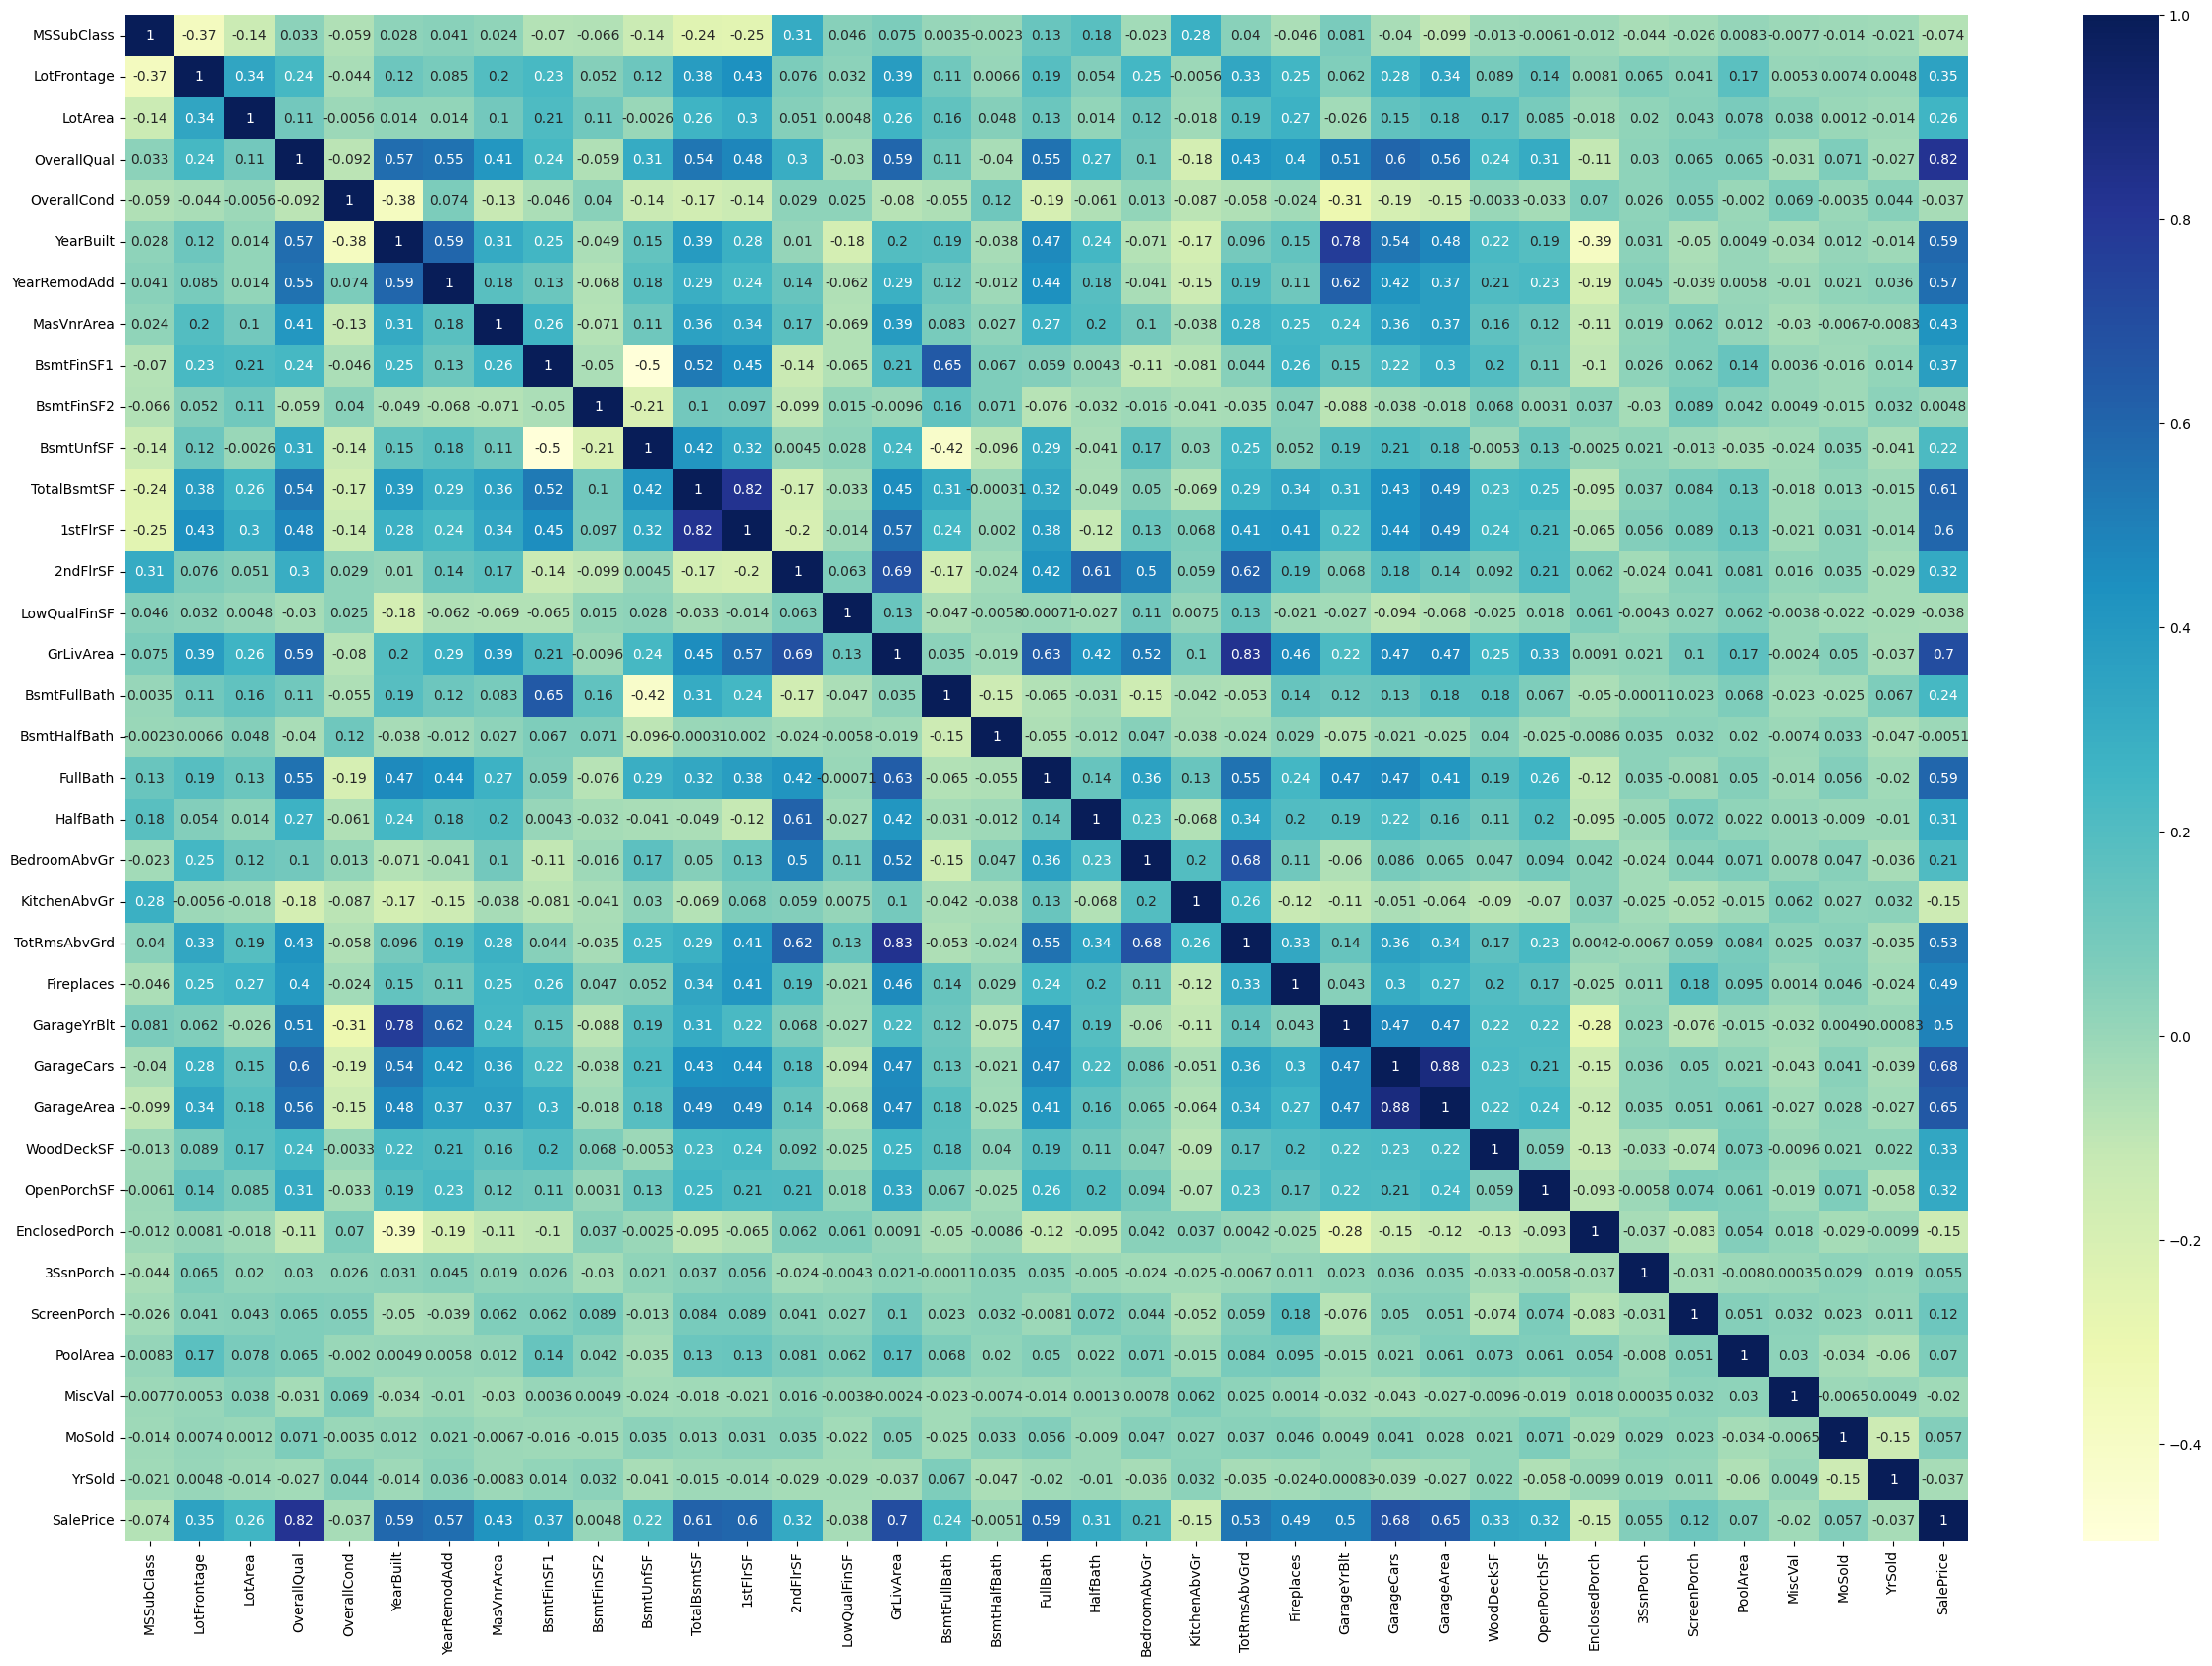

In [29]:
cor = data[cont_columns].corr()
plt.figure(figsize=(30,20))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

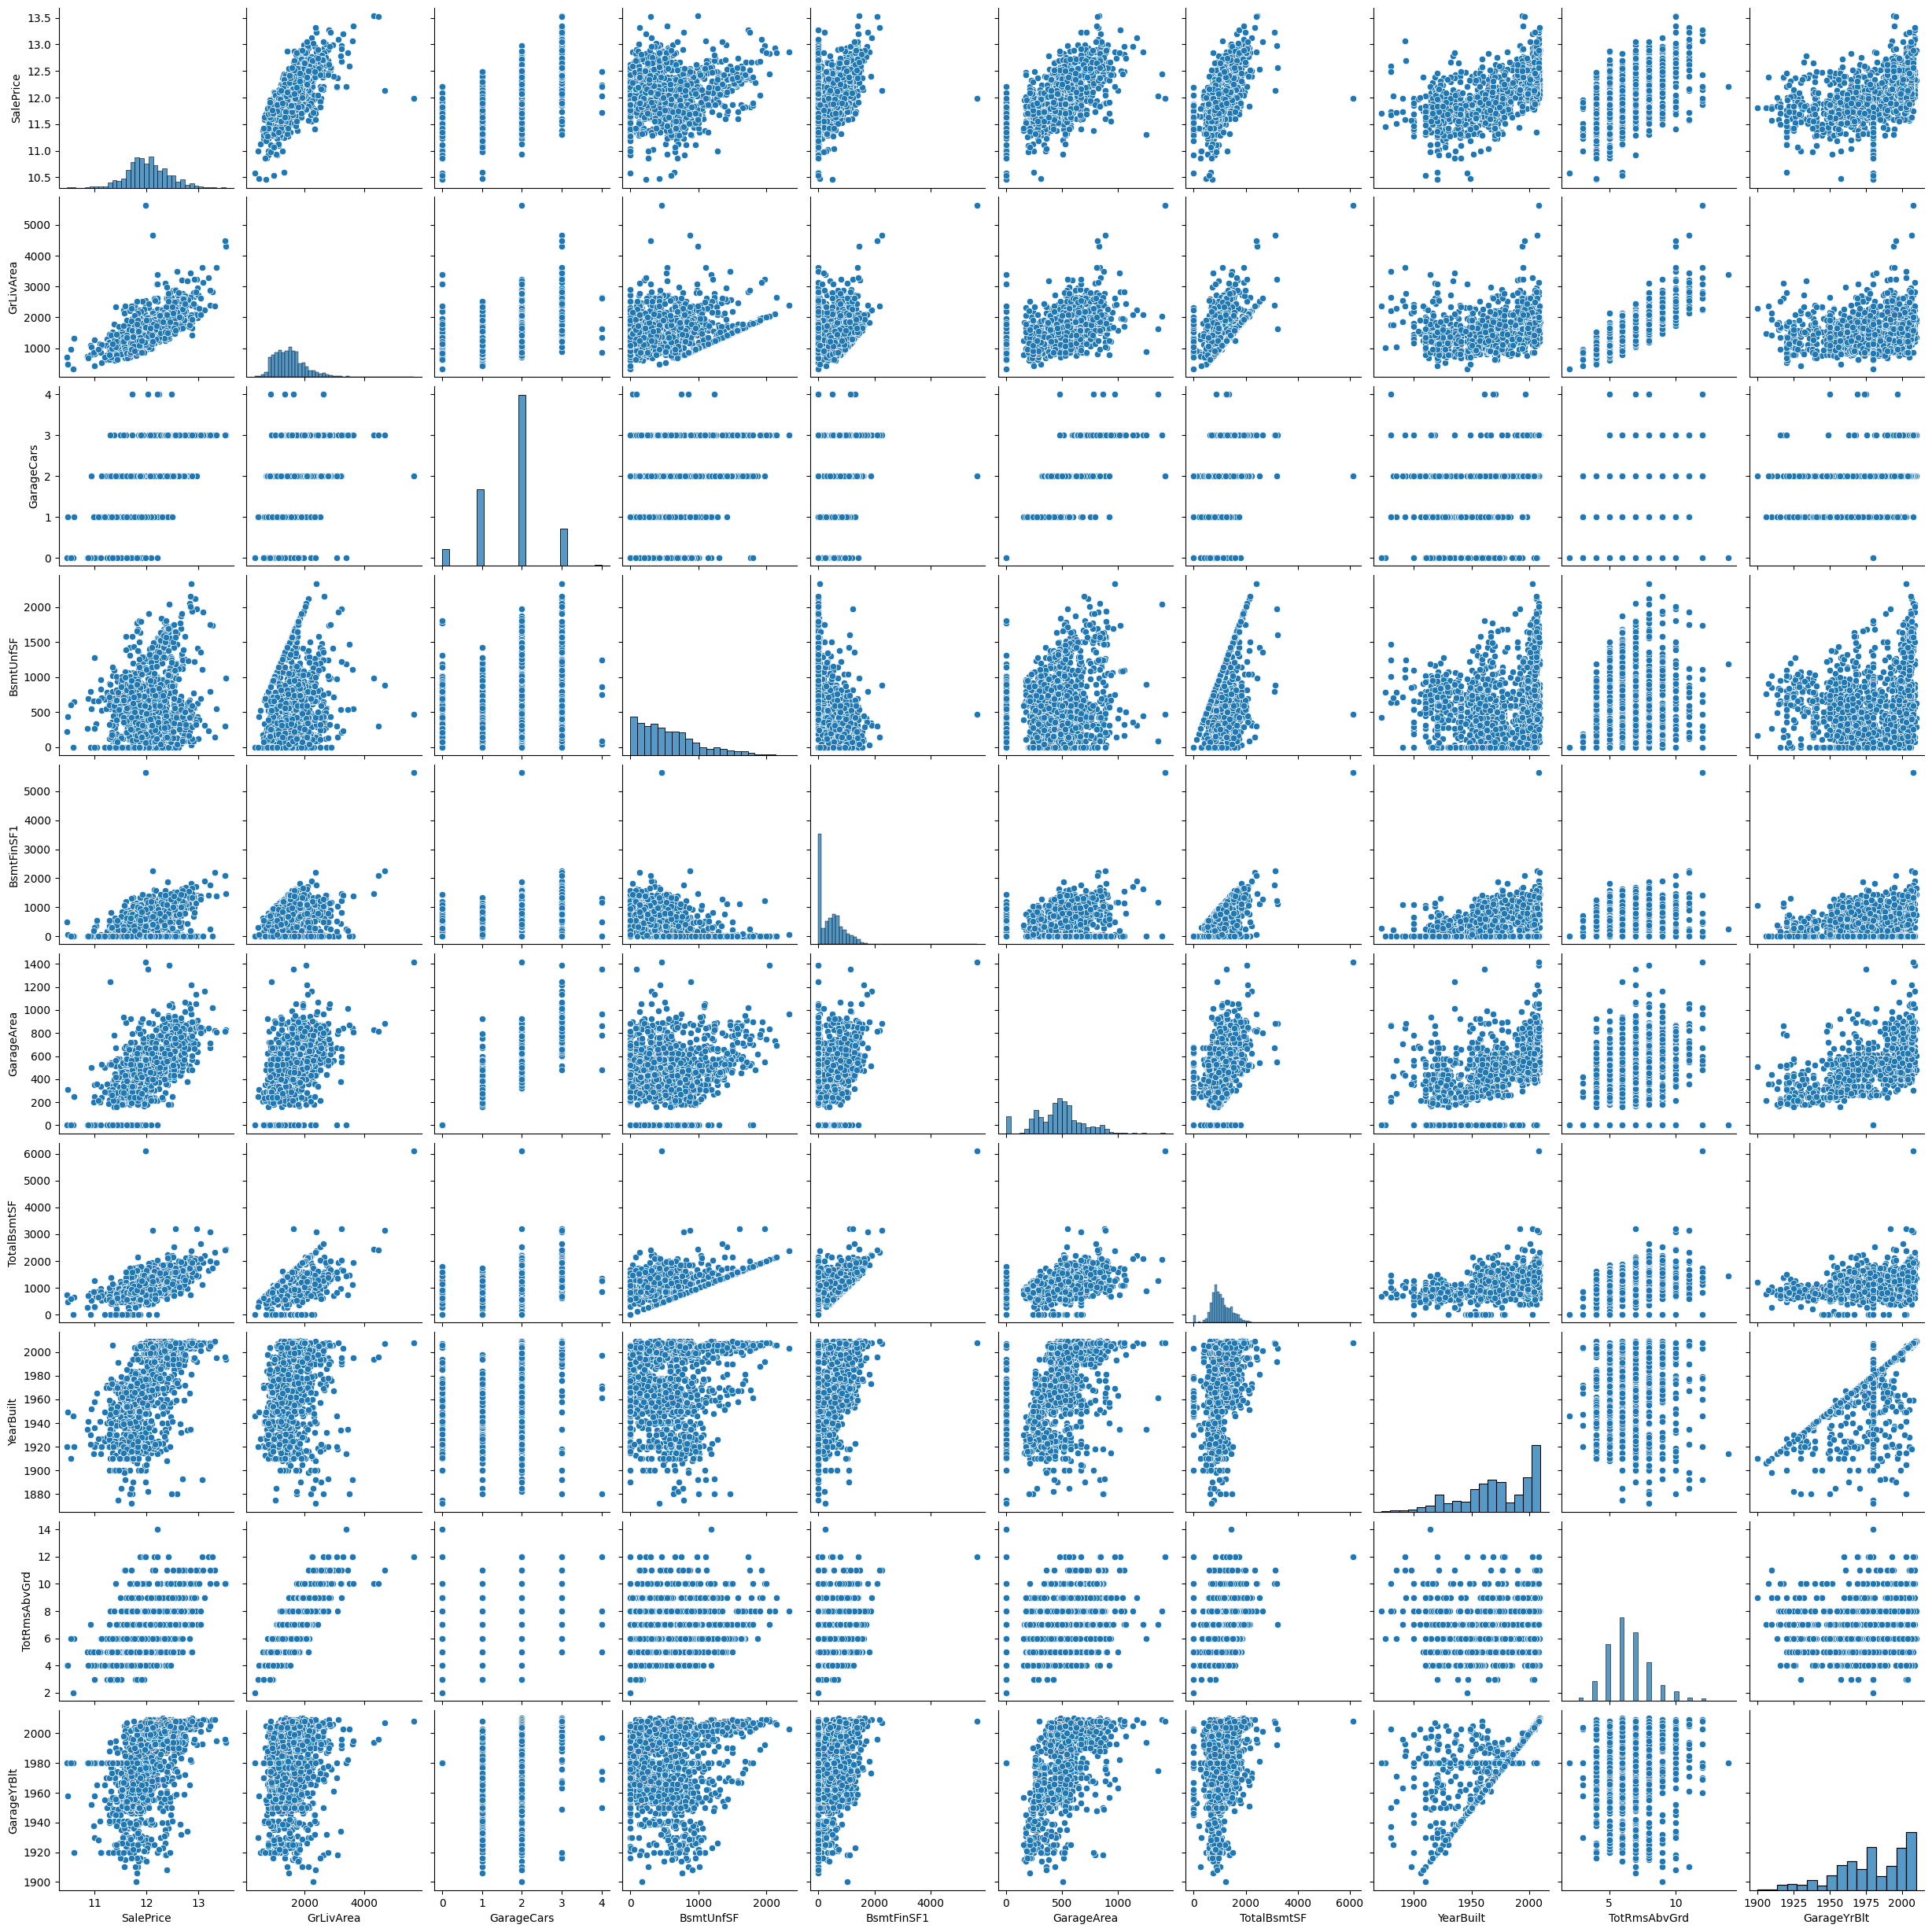

In [30]:
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

In [31]:
#Dropping columns that are correlated with each other
data = data.drop(['GarageCars'], axis = 1)
data = data.drop(['BsmtUnfSF'], axis = 1)
data = data.drop(['TotRmsAbvGrd'], axis = 1)
data = data.drop(['GarageYrBlt'], axis = 1)    

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,12.429220


# Data Preparation

In [32]:
data['PropAge'] = (data['YrSold'] - data['YearBuilt'])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,12.429220,8


In [33]:
data = data.drop(['MoSold'], axis = 1)
data = data.drop(['YrSold'], axis = 1)
data = data.drop(['YearBuilt'], axis = 1)
data = data.drop(['YearRemodAdd'], axis = 1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,WD,Normal,12.429220,8


In [34]:
data = pd.get_dummies(data, drop_first=True )
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,False,False,False,False,True,False,False,False,True,False


In [35]:
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Model Building

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [37]:
scaler = StandardScaler()
X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])
X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

In [38]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select = 100)            
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 49),
 ('LotFrontage', False, 97),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 137),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 40),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 33),
 ('BsmtHalfBath', False, 133),
 ('FullBath', False, 109),
 ('HalfBath', False, 103),
 ('BedroomAbvGr', False, 66),
 ('KitchenAbvGr', False, 10),
 ('Fireplaces', False, 104),
 ('GarageArea', False, 6),
 ('WoodDeckSF', False, 52),
 ('OpenPorchSF', False, 101),
 ('EnclosedPorch', False, 96),
 ('3SsnPorch', False, 100),
 ('ScreenPorch', False, 92),
 ('PoolArea', False, 111),
 ('MiscVal', False, 139),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', True, 1),
 ('Alley_Pave', False, 127),
 ('Alley_none', False, 120),
 ('LotSha

In [39]:
select_columns = X_train.columns[rfe.support_]
X_train_rfe = pd.DataFrame(X_train[select_columns])

X_train_rfe.shape

(1021, 100)

In [40]:
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9574726801510925

In [41]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.8614536454944477

R2 value for the above model is very less, hence let's try ridge and lasso regression

# Ridge & Lasso Regression

In [42]:
#Lasso Regression

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
gridcv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

gridcv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [43]:
cv_results = pd.DataFrame(gridcv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.115186,0.040524,0.007503,0.001146,0.0001,{'alpha': 0.0001},-0.090114,-0.091696,-0.095640,-0.085684,...,-0.088798,0.005093,1,-0.063718,-0.059531,-0.063356,-0.064396,-0.064289,-0.063058,0.001804
1,0.042970,0.003428,0.007901,0.000650,0.001,{'alpha': 0.001},-0.092189,-0.095450,-0.098309,-0.078274,...,-0.090498,0.006969,2,-0.081524,-0.071779,-0.076914,-0.084016,-0.082162,-0.079279,0.004419
2,0.022698,0.003011,0.007430,0.001191,0.01,{'alpha': 0.01},-0.096061,-0.109219,-0.107705,-0.093463,...,-0.101058,0.006299,3,-0.100169,-0.089165,-0.096294,-0.101769,-0.101897,-0.097859,0.004795
3,0.021747,0.001017,0.006927,0.000736,0.05,{'alpha': 0.05},-0.120542,-0.136022,-0.131500,-0.127998,...,-0.129261,0.005085,4,-0.131523,-0.118231,-0.126303,-0.130290,-0.132543,-0.127778,0.005222
4,0.021541,0.002581,0.007873,0.001102,0.1,{'alpha': 0.1},-0.158547,-0.171378,-0.163073,-0.159296,...,-0.163407,0.004603,5,-0.163811,-0.156503,-0.160730,-0.162327,-0.166981,-0.162070,0.003464


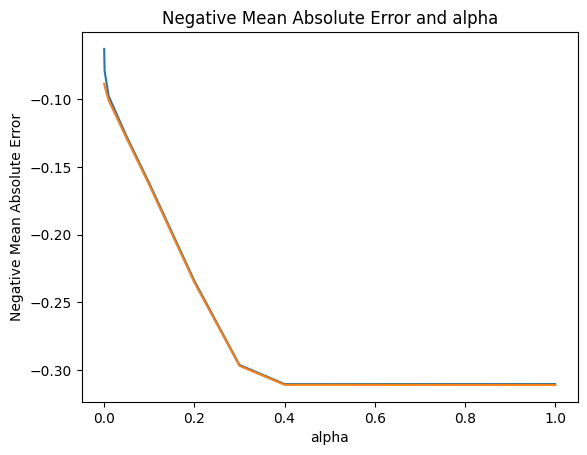

In [44]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
#plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [45]:
#alpha = 0.01, have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-2.03271110e-02,  0.00000000e+00,  9.69235756e-03,  1.31084525e-01,
        4.07832364e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.08347237e-02,  5.71013288e-03,  0.00000000e+00, -0.00000000e+00,
        1.08342607e-01,  3.30906608e-02,  0.00000000e+00,  1.72286440e-02,
        1.16928625e-03,  0.00000000e+00, -2.82932390e-03,  3.24471362e-02,
        4.52516140e-02,  1.40654814e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.45588155e-03, -1.72684054e-02, -2.45999820e-06,
       -9.12186434e-02,  0.00000000e+00,  0.00000000e+00,  3.08134936e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [46]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.018),
 ('MSSubClass', -0.02),
 ('LotFrontage', 0.0),
 ('LotArea', 0.01),
 ('OverallQual', 0.131),
 ('OverallCond', 0.041),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.021),
 ('1stFlrSF', 0.006),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.108),
 ('BsmtFullBath', 0.033),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.017),
 ('HalfBath', 0.001),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.003),
 ('Fireplaces', 0.032),
 ('GarageArea', 0.045),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.004),
 ('PoolArea', -0.017),
 ('MiscVal', -0.0),
 ('PropAge', -0.091),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.003),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('Alley_Pave', 0.0),
 ('Alley_none', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContou

In [47]:
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction Using R2
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8542389551108404
0.859786591831921


In [48]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1518895065110925


In [49]:
para = pd.DataFrame(list(zip(cols, model_parameters)))
para.columns = ['Variable', 'Coeff']
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
pred = pd.DataFrame(para[(para['Coeff'] != 0)])

In [50]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'OverallQual', 'GrLivArea', 'GarageArea', 'OverallCond', 'BsmtFullBath', 'Fireplaces', 'TotalBsmtSF', 'FullBath', 'WoodDeckSF', 'LotArea', '1stFlrSF', 'ScreenPorch', 'GarageType_Attchd', 'MSZoning_RL', 'HalfBath', 'HeatingQC_TA', 'KitchenAbvGr', 'PoolArea', 'MSSubClass', 'PropAge']


In [51]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
210,-1.228053,-0.779861,0.383154,-0.430911,-2.217786,0.043512,-0.925422,-0.473765,-0.136829,1.066863,False,-0.709347,-1.026085,-0.275126,-0.743160
318,2.123103,0.649651,-0.533005,0.621579,0.867506,1.160345,0.623522,-0.056845,0.889247,1.066863,True,0.197980,0.786428,-0.275126,1.989482
239,-0.056465,-0.065105,-1.449164,-0.712011,-1.183084,-0.761296,0.623522,-0.169324,-0.806009,-0.837450,False,1.407748,-1.026085,-0.275126,-0.743160
986,0.221858,-0.065105,2.215472,-1.256778,-1.018473,-0.963574,-0.925422,-0.502297,-0.493725,-0.837450,False,-0.709347,-1.026085,-0.275126,2.423490
1416,1.453624,-1.494617,0.383154,-0.620490,0.416000,-0.963574,-0.925422,0.082905,-0.449113,-0.837450,True,-0.709347,0.786428,-0.275126,-0.743160


In [52]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,Foundation_PConc,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
1436,-1.268092,-1.574844,0.377745,-0.473033,0.238541,0.420867,-1.011862,-0.173195,-0.466009,-0.778198,True,-0.690864,-1.023721,-0.267159,-0.771409
57,0.410443,0.657459,-0.483986,-0.483360,0.409443,-0.996087,-1.011862,0.114799,0.826121,-0.778198,True,0.362909,0.799002,-0.267159,-0.771409
780,-0.505300,0.657459,-0.483986,0.489962,-0.343449,-0.996087,0.548686,-0.295688,-0.332341,-0.778198,True,-0.374732,0.799002,-0.267159,0.956863
382,0.561432,0.657459,-0.483986,-0.279402,0.751247,-0.996087,-1.011862,-0.146519,0.380559,-0.778198,True,0.106993,0.799002,-0.267159,0.359824
1170,-0.770022,-0.086642,0.377745,0.125934,-0.546683,0.204644,0.548686,-0.077379,0.246890,1.215081,False,-0.690864,-1.023721,-0.267159,0.823315


# Ridge Regression

In [53]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
gridcv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
gridcv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
cv_results = pd.DataFrame(gridcv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019698,0.004331,0.008366,0.003398,0.0001,{'alpha': 0.0001},-0.091409,-0.095225,-0.096940,-0.098983,...,-0.093479,0.004985,14,-0.055123,-0.056181,-0.056433,-0.058049,-0.056266,-0.056410,0.000940
1,0.017701,0.001621,0.007392,0.001081,0.001,{'alpha': 0.001},-0.091348,-0.095198,-0.096948,-0.098544,...,-0.093338,0.004959,13,-0.055158,-0.056189,-0.056481,-0.058073,-0.056321,-0.056444,0.000937
2,0.016311,0.001210,0.007880,0.000376,0.01,{'alpha': 0.01},-0.091947,-0.094966,-0.097406,-0.095376,...,-0.092765,0.004657,11,-0.056131,-0.056272,-0.057331,-0.058689,-0.057349,-0.057154,0.000922
3,0.016718,0.001463,0.008164,0.000742,0.05,{'alpha': 0.05},-0.095765,-0.094238,-0.099907,-0.090612,...,-0.093617,0.004248,15,-0.060081,-0.056663,-0.060897,-0.062199,-0.061378,-0.060244,0.001918
4,0.017511,0.001157,0.008199,0.000437,0.1,{'alpha': 0.1},-0.097805,-0.093740,-0.101558,-0.089096,...,-0.094655,0.004520,18,-0.062696,-0.057164,-0.063090,-0.064970,-0.064154,-0.062415,0.002744


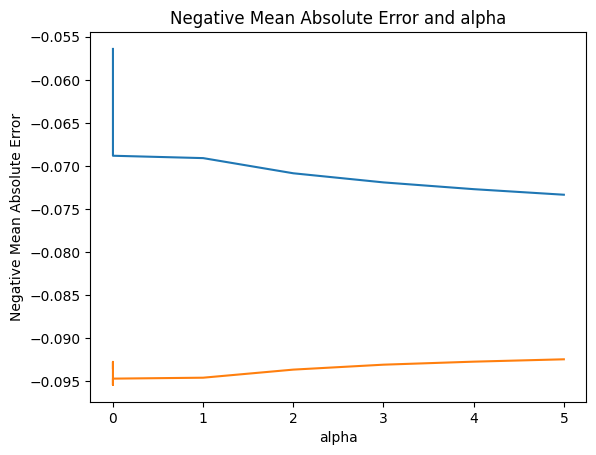

In [55]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
#plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [56]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.41505696e-02, -9.72741226e-03,  1.85520709e-02,  7.24315197e-02,
        4.11583677e-02, -4.35928055e-03, -1.22964567e-02,  4.69492093e-03,
        6.86536856e-03,  4.41421817e-02,  4.67067366e-02,  2.74260369e-03,
        7.14875685e-02,  2.80624574e-02,  3.80607100e-03,  1.88999594e-02,
        1.26907852e-02,  1.74760783e-02, -1.00405948e-02, -5.22663732e-03,
        3.19522565e-02,  1.19603509e-02, -1.57669981e-03,  8.18246968e-03,
        8.10699869e-03,  9.60984369e-03, -1.36106997e-02, -9.86185641e-07,
       -3.83293476e-02,  1.26706185e-01,  1.48088296e-01,  1.59942201e-01,
        1.34981988e-01,  4.79373872e-02,  3.69815704e-02, -2.95237711e-05,
        2.58868230e-02, -6.55488534e-02,  7.99205640e-03,  5.80074092e-02,
        6.63783192e-02,  6.88359837e-02, -5.11097773e-02,  3.86288515e-02,
       -4.60401814e-02, -3.31587781e-02, -1.22476419e-02,  2.75840154e-02,
       -2.72074902e-02, -1.58716651e-02, -5.86270971e-02,  3.66517259e-03,
        8.22763166e-02, -

In [57]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.459),
 ('MSSubClass', -0.024),
 ('LotFrontage', -0.01),
 ('LotArea', 0.019),
 ('OverallQual', 0.072),
 ('OverallCond', 0.041),
 ('MasVnrArea', -0.004),
 ('BsmtFinSF1', -0.012),
 ('BsmtFinSF2', 0.005),
 ('TotalBsmtSF', 0.007),
 ('1stFlrSF', 0.044),
 ('2ndFlrSF', 0.047),
 ('LowQualFinSF', 0.003),
 ('GrLivArea', 0.071),
 ('BsmtFullBath', 0.028),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.019),
 ('HalfBath', 0.013),
 ('BedroomAbvGr', 0.017),
 ('KitchenAbvGr', -0.01),
 ('Fireplaces', -0.005),
 ('GarageArea', 0.032),
 ('WoodDeckSF', 0.012),
 ('OpenPorchSF', -0.002),
 ('EnclosedPorch', 0.008),
 ('3SsnPorch', 0.008),
 ('ScreenPorch', 0.01),
 ('PoolArea', -0.014),
 ('MiscVal', -0.0),
 ('PropAge', -0.038),
 ('MSZoning_FV', 0.127),
 ('MSZoning_RH', 0.148),
 ('MSZoning_RL', 0.16),
 ('MSZoning_RM', 0.135),
 ('Street_Pave', 0.048),
 ('Alley_Pave', 0.037),
 ('Alley_none', -0.0),
 ('LotShape_IR2', 0.026),
 ('LotShape_IR3', -0.066),
 ('LotShape_Reg', 0.008),
 ('LandContour_HLS', 0.058),

In [58]:
# ridge regression
lm1 = Ridge(alpha=2)
lm1.fit(X_train, y_train)

# predict
y_train_pred = lm1.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm1.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9292412832677945
0.8889350338006375


In [59]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


RMSE : 0.13518283266648262


In [60]:
mod_ridge = list(zip(cols, model_parameters))
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])



In [61]:
predRFE[0:20]
#Features selected in Ridge regression

,Variable,Coeff
0,constant,11.459
32,MSZoning_RL,0.160
111,RoofMatl_WdShngl,0.156
231,SaleType_ConLD,0.151
31,MSZoning_RH,0.148
55,Neighborhood_Crawfor,0.139
33,MSZoning_RM,0.135
30,MSZoning_FV,0.127
105,RoofMatl_CompShg,0.119
65,Neighborhood_NridgHt,0.118


In [62]:
pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16','x17','x18','x19','x20']), inplace = True) 
pred

#Features selected in lasso regression

,Variable,Coeff
C,constant,12.018
x1,OverallQual,0.131
x2,GrLivArea,0.108
x3,GarageArea,0.045
x4,OverallCond,0.041
x5,BsmtFullBath,0.033
x6,Fireplaces,0.032
x7,TotalBsmtSF,0.021
x8,FullBath,0.017
x9,WoodDeckSF,0.014
